In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


Xo, yo = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
import numpy as np

X, y = Xo, yo
y = y.astype(int)
X = ((X / 255.) - .5) * 2
#X=X.iloc[:, :2].values
print('Class labels:', np.unique(y))
print(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

Class labels: [0 1 2 3 4 5 6 7 8 9]
       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0        -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0   
1        -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0   
2        -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0   
3        -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0   
4        -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0   
69996    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0   
69997    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0   
69998    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0   
69999    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    

In [18]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

sc = StandardScaler()

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('1','s', 'x', 'o', '^', 'v')
    colors = ('yellow','red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    #color=colors[idx],
                    #marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

/Users/chien/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test score: 0.9216


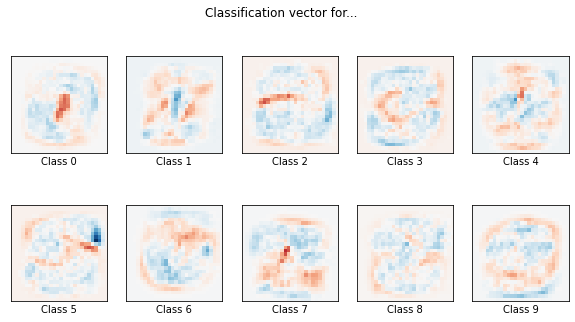

In [68]:
#lr = LogisticRegression(C=100.0, penalty="l1", solver="saga", tol=0.1)
lr = LogisticRegression(C=100.0,random_state=1, solver='lbfgs',max_iter=100)


lr.fit(X_train, y_train)
#sparsity = np.mean(lr.coef_ == 0) * 100
score = lr.score(X_test, y_test)
#print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score: %.4f" % score)


coef = lr.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression
import numpy as np

lr = LogisticRegression(C=100.0, random_state=1, solver='sag', multi_class='auto',max_iter=100)
lr.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

'''
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()
'''

lr.score(X_test_std, y_test)

/Users/chien/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9207619047619048